In [1]:
import os

In [2]:
print(os.listdir('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'))

['cats', 'dogs', 'horses', 'humans']


In [3]:
folders = os.listdir('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/')

In [4]:
folders

['cats', 'dogs', 'horses', 'humans']

In [5]:
for i in folders:
    print(i, len(os.listdir('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/' + i)))

cats 181
dogs 181
horses 181
humans 181


In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
img = image.load_img('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/dogs/dog.100.jpg')

In [8]:
import numpy as np
img = np.array(img)

In [9]:
img.shape

(397, 500, 3)

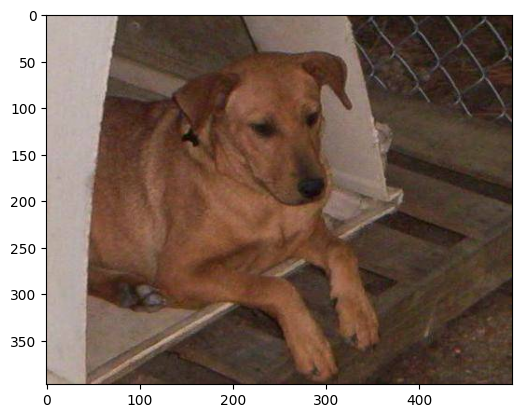

In [10]:
plt.imshow(img)

In [11]:
# total_images = []
# total_images.append(img)

In [12]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
num_class = 4
img_shape = (255, 255, 3)
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(60, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(120, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(240, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(num_class, activation = 'softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 60)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 120)       64920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 120)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 240)       259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 240)       0

In [14]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [keras.metrics.CategoricalAccuracy()])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_set = ImageDataGenerator(
                                rescale = 1/255,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                horizontal_flip = 0.2,
                                zoom_range = 0.2)
valid_set = ImageDataGenerator(rescale = 1/255)

In [17]:
path = 'C:/Users/bhatt/OneDrive/Desktop/whisper-main/Cat_Dog_Horse_Human_Dataset-20230906T140539Z-001/Cat_Dog_Horse_Human_Dataset/'
train_gen = train_set.flow_from_directory(
                                        path,
                                        target_size = (255, 255), 
                                        batch_size = 100,
                                        class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [18]:
# val_path = 

In [19]:
X, Y = next(train_gen)

In [20]:
print(X.shape, Y)

(100, 255, 255, 3) [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1

In [ ]:
hist = model.fit_generator(train_gen, epochs = 1000)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_19340\829194604.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 1000)


Epoch 1/1000
8/8 [==============================] - 67s 7s/step - loss: 5.3979 - categorical_accuracy: 0.2403
Epoch 2/1000
8/8 [==============================] - 47s 6s/step - loss: 1.3624 - categorical_accuracy: 0.2970
Epoch 3/1000
8/8 [==============================] - 45s 5s/step - loss: 1.2883 - categorical_accuracy: 0.3702
Epoch 4/1000
8/8 [==============================] - 46s 6s/step - loss: 1.2230 - categorical_accuracy: 0.4448
Epoch 5/1000
8/8 [==============================] - 46s 6s/step - loss: 1.1880 - categorical_accuracy: 0.4834
Epoch 6/1000
8/8 [==============================] - 45s 5s/step - loss: 1.0911 - categorical_accuracy: 0.5470
Epoch 7/1000
8/8 [==============================] - 49s 6s/step - loss: 1.0511 - categorical_accuracy: 0.5304
Epoch 8/1000
8/8 [==============================] - 45s 5s/step - loss: 1.0589 - categorical_accuracy: 0.5359
Epoch 9/1000
8/8 [==============================] - 45s 5s/step - loss: 1.0001 - categorical_accuracy: 0.5787
Epoch 10/1